In [1]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.12.0 which is incompatible.


In [2]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in your Google Drive
csv_file_path = '/content/drive/MyDrive/household_power_consumption.txt'

# Read CSV using pandas
dataset = pd.read_csv(csv_file_path, sep=';', header=0, low_memory=False,
infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

# Display the CSV data
dataset

Mounted at /content/drive


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [3]:
# replace ? with nan
import numpy as np
dataset.replace('?', np.nan, inplace=True)

In [4]:
# check columns type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
# convert all dataset to float type
dataset=dataset.astype('float32')

In [6]:
# check nan values (before preprocessing)
dataset.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if pd.isnull(values[row, col]):
                values[row, col] = values[row - one_day, col]

In [8]:
# fill missing values with a value at the same time one day ago
fill_missing(dataset.values)

In [9]:
# check nan values (after preprocessing)
dataset.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
# add a column for the remainder of sub metering (we added this column by making some caculation in order to add a new column because the more columns we have the better model will work)
values = dataset.values.astype('float32')
dataset['Sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [11]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,43.099998
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0,15.766666
2010-11-26 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0,15.733334
2010-11-26 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0,15.633333


In [12]:
# columns explanation :
# Global_active_power = measure of the total electrical power consumed by a house over a specific period of time (measured in units of watts (W))
# Global_reactive_power = represents the actual power consumed to perform useful work, the power that oscillates back and forth between the load and the source without doing any useful work (measured in units of volt-amperes reactive (VAR))
# Voltage = represents the force or pressure that pushes electrical current (measured in volts (V))
# Global_intensity = the total electrical current being drawn from the electrical supply at a given moment (measured in amperes (A))
# Sub_metering_1, Sub_metering_2, Sub_metering_3, Sub_metering_4 = used to provide more detailed information about how electrical energy is being used within a househ
# Sub_metering_1 = the electrical energy consumption related to specific heating systems or appliances
# Sub_metering_2 = electrical energy consumption related to air conditioning and cooling systems
# Sub_metering_3 = electrical energy consumption related to water heating
# Sub_metering_4 = the net energy consumption

In [13]:
# details
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
 7   Sub_metering_4         float32
dtypes: float32(8)
memory usage: 79.2 MB


In [14]:
# details
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089417e+00,1.236871e-01,2.408364e+02,4.618402e+00,1.118474e+00,1.291131e+00,6.448635e+00,9.298722e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00,9.561277e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [15]:
# normalization (Global_active_power)
min_val0 = dataset['Global_active_power'].min()
max_val0 = dataset['Global_active_power'].max()


dataset['Global_active_power'] = (dataset['Global_active_power'] - min_val0) / (max_val0 - min_val0)


In [16]:
# normalization (Global_reactive_power)
min_val1 = dataset['Global_reactive_power'].min()
max_val1 = dataset['Global_reactive_power'].max()


dataset['Global_reactive_power'] = (dataset['Global_reactive_power'] - min_val1) / (max_val1 - min_val1)


In [17]:
# normalization (Voltage)
min_val2 = dataset['Voltage'].min()
max_val2 = dataset['Voltage'].max()


dataset['Voltage'] = (dataset['Voltage'] - min_val2) / (max_val2 - min_val2)

In [18]:
# normalization (Global_intensity)
min_val3 = dataset['Global_intensity'].min()
max_val3 = dataset['Global_intensity'].max()


dataset['Global_intensity'] = (dataset['Global_intensity'] - min_val3) / (max_val3 - min_val3)

In [19]:
# normalization (Sub_metering_1)
min_val4 = dataset['Sub_metering_1'].min()
max_val4 = dataset['Sub_metering_1'].max()


dataset['Sub_metering_1'] = (dataset['Sub_metering_1'] - min_val4) / (max_val4 - min_val4)

In [20]:
# normalization (Sub_metering_2)
min_val5 = dataset['Sub_metering_2'].min()
max_val5 = dataset['Sub_metering_2'].max()


dataset['Sub_metering_2'] = (dataset['Sub_metering_2'] - min_val5) / (max_val5 - min_val5)

In [21]:
# normalization (Sub_metering_3)
min_val6 = dataset['Sub_metering_3'].min()
max_val6 = dataset['Sub_metering_3'].max()


dataset['Sub_metering_3'] = (dataset['Sub_metering_3'] - min_val6) / (max_val6 - min_val6)

In [22]:
# normalization (Sub_metering_4)
min_val7 = dataset['Sub_metering_4'].min()
max_val7 = dataset['Sub_metering_4'].max()


dataset['Sub_metering_4'] = (dataset['Sub_metering_4'] - min_val7) / (max_val7 - min_val7)

In [ ]:
# reverse normalisation min-max to get the true values
# dataset['Sub_metering_4'] = dataset['Sub_metering_4'] * (max_val7 - min_val7) + min_val7

In [23]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.429657
2006-12-16 17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.587372
2006-12-16 17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.573487
2006-12-16 17:27:00,0.480898,0.361151,0.340550,0.473029,0.0,0.0125,0.548387,0.583181
2006-12-16 17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.357611
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.078762,0.000000,0.556704,0.078838,0.0,0.0000,0.000000,0.142782
2010-11-26 20:59:00,0.078580,0.000000,0.542811,0.078838,0.0,0.0000,0.000000,0.142520
2010-11-26 21:00:00,0.078037,0.000000,0.536996,0.074689,0.0,0.0000,0.000000,0.141734


In [24]:
# imports for CNN model
# multichannel multi-step cnn for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.optimizers import RMSprop

In [25]:
# split dataset into train, test and val
import numpy as np

# Assuming your data is already loaded into a NumPy array called 'data'

# Calculate the total length of your data and the desired proportions
total_length = len(dataset)
train_proportion = 0.6
test_proportion = 0.2
val_proportion = 0.2

# Calculate the number of samples for each set
train_length = int(total_length * train_proportion)
test_length = int(total_length * test_proportion)
val_length = int(total_length * val_proportion)

# Ensure that the lengths are divisible by 7
train_length = train_length - train_length % 7
test_length = test_length - test_length % 7
val_length = val_length - val_length % 7

# Split the data accordingly
train = dataset[:train_length]
test = dataset[train_length + val_length:train_length + val_length + test_length]
val = dataset[train_length:train_length + val_length]

# Reshape into windows of weekly data
train = np.array(np.split(train, len(train) // 7))
test = np.array(np.split(test, len(test) // 7))
val = np.array(np.split(val, len(val) // 7))


In [26]:
# train content
train

array([[[0.3747963 , 0.30071944, 0.3760905 , ..., 0.0125    ,
         0.5483871 , 0.42965686],
        [0.47836322, 0.31366906, 0.33699545, ..., 0.0125    ,
         0.516129  , 0.5873723 ],
        [0.47963065, 0.3582734 , 0.3260096 , ..., 0.025     ,
         0.5483871 , 0.57348704],
        ...,
        [0.32500452, 0.3798561 , 0.4032309 , ..., 0.0125    ,
         0.5483871 , 0.3576107 ],
        [0.3117871 , 0.37553957, 0.38190657, ..., 0.025     ,
         0.5483871 , 0.33062616],
        [0.32826364, 0.37410071, 0.38416803, ..., 0.0125    ,
         0.5483871 , 0.36232644]],

       [[0.3280826 , 0.37410071, 0.38836852, ..., 0.0125    ,
         0.5483871 , 0.36206445],
        [0.3251856 , 0.36690646, 0.34862712, ..., 0.0125    ,
         0.5483871 , 0.3578727 ],
        [0.32464242, 0.36690646, 0.34442663, ..., 0.025     ,
         0.516129  , 0.35708675],
        ...,
        [0.48307082, 0.3381295 , 0.3095316 , ..., 0.0125    ,
         0.5483871 , 0.58632433],
        [0.4

In [27]:
# test content
test

array([[[0.01828716, 0.        , 0.81292427, ..., 0.        ,
         0.03225806, 0.04741944],
        [0.02426218, 0.07194245, 0.82455593, ..., 0.        ,
         0.03225806, 0.05606497],
        [0.02335687, 0.07194245, 0.8313408 , ..., 0.0125    ,
         0.        , 0.05475504],
        ...,
        [0.02335687, 0.0733813 , 0.86171246, ..., 0.0125    ,
         0.03225806, 0.04689547],
        [0.02335687, 0.07194245, 0.8591276 , ..., 0.025     ,
         0.03225806, 0.03903589],
        [0.02353793, 0.07194245, 0.86171246, ..., 0.0125    ,
         0.        , 0.05501703]],

       [[0.02335687, 0.07050359, 0.8103394 , ..., 0.0125    ,
         0.03225806, 0.04689547],
        [0.02317581, 0.0676259 , 0.7718902 , ..., 0.025     ,
         0.03225806, 0.03877391],
        [0.0287887 , 0.11366907, 0.747981  , ..., 0.0125    ,
         0.        , 0.06261462],
        ...,
        [0.03041825, 0.1438849 , 0.7269791 , ..., 0.0125    ,
         0.03225806, 0.05711292],
        [0.0

In [28]:
# val content
val

array([[[0.02082202, 0.        , 0.5903071 , ..., 0.        ,
         0.03225806, 0.05108724],
        [0.02082202, 0.        , 0.5735057 , ..., 0.        ,
         0.        , 0.05894681],
        [0.02263263, 0.        , 0.5793218 , ..., 0.        ,
         0.03225806, 0.0537071 ],
        ...,
        [0.02752127, 0.04028777, 0.539257  , ..., 0.        ,
         0.        , 0.0686403 ],
        [0.02752127, 0.04028777, 0.5318258 , ..., 0.        ,
         0.03225806, 0.06078072],
        [0.02734021, 0.04028777, 0.5282717 , ..., 0.        ,
         0.        , 0.06837831]],

       [[0.02933189, 0.04892087, 0.5470116 , ..., 0.        ,
         0.03225806, 0.06340057],
        [0.03711751, 0.13381295, 0.52956384, ..., 0.        ,
         0.03225806, 0.07466597],
        [0.03675539, 0.13525179, 0.5402263 , ..., 0.        ,
         0.        , 0.08200157],
        ...,
        [0.03639326, 0.1381295 , 0.5586433 , ..., 0.        ,
         0.03225806, 0.07361802],
        [0.0

In [29]:
# convert all data to float type because CNN work on numerical values
train = train.astype('float32')
test = test.astype('float32')
val = val.astype('float32')

In [30]:
# convert data (example : train) into inputs and outputs   x/y
def to_supervised(train, n_input, n_out=7):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end < len(data):
            X.append(data[in_start:in_end, :])
            y.append(data[in_end:out_end,0])
        # move along one time step
        in_start = n_input+in_start
    return array(X), array(y)

In [31]:
# convert train data into inputs and outputs   x/y
n_input=12
# prepare data
train_x, train_y = to_supervised(train, n_input)

In [32]:
# convert val data into inputs and outputs   x/y
val_x, val_y = to_supervised(val, n_input)

In [33]:
# input train content(second element of the matrix)
train_x[1]

array([[0.46605107, 0.3438849 , 0.31631693, 0.4605809 , 0.        ,
        0.0125    , 0.516129  , 0.56955725],
       [0.47003442, 0.28633094, 0.3137321 , 0.46473026, 0.        ,
        0.025     , 0.5483871 , 0.55960184],
       [0.36013037, 0.30359712, 0.38901484, 0.36099583, 0.        ,
        0.0125    , 0.5483871 , 0.40843597],
       [0.29947495, 0.2028777 , 0.450404  , 0.2904564 , 0.        ,
        0.        , 0.5483871 , 0.32853028],
       [0.28915447, 0.10935251, 0.4371567 , 0.2821577 , 0.        ,
        0.        , 0.5483871 , 0.31359708],
       [0.30363935, 0.11223022, 0.4478191 , 0.2946058 , 0.        ,
        0.        , 0.5483871 , 0.33455592],
       [0.28879234, 0.        , 0.45008108, 0.2821577 , 0.        ,
        0.        , 0.58064514, 0.30521354],
       [0.33061743, 0.        , 0.40840065, 0.33609957, 0.        ,
        0.        , 0.5483871 , 0.37359184],
       [0.5267065 , 0.        , 0.3066238 , 0.52282155, 0.        ,
        0.        , 0.516129

In [34]:
# output train content (first element of the matrix)
train_y[0]

array([0.46605107, 0.47003442, 0.36013037, 0.29947495, 0.28915447,
       0.30363935, 0.28879234], dtype=float32)

In [35]:
# build CNN model with 8 layers and fully connected
import tensorflow as tf
# define parameters
# verbose, epochs, batch_size = 0, 70, 16
verbose = 1
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# define model
def cnn_model(filters=32, kernel_size=3, pool_size=2, dense_units=100, batch_size=16, epochs=70, activation='linear'):
  model = Sequential()
  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation,
  input_shape=(n_timesteps,n_features)))
  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation))
  model.add(MaxPooling1D(pool_size=pool_size))
  model.add(Conv1D(filters=filters//2, kernel_size=kernel_size, activation=activation))
  model.add(MaxPooling1D(pool_size=pool_size))
  model.add(Flatten())
  model.add(Dense(dense_units, activation=activation))
  model.add(Dense(n_outputs))
  model.compile(optimizer='adam', loss='mse', metrics=["mae"])
  return model

In [36]:
# model description :
# this model is designed for regression tasks
# Input Layer = 1D Convolutional Layer : it's responsible for processing the input data which is expected to have a shape of (n_timesteps, n_features)
# Convolutional Layer 2 = 1D Convolutional Layer : This layer follows the first convolutional layer and performs additional convolution operations
# Max Pooling Layer 1 = is applied after the convolutional layers to reduce the spatial dimensions of the data. It helps in reducing computational complexity and controlling overfitting
# Convolutional Layer 3 = 1D Convolutional Layer : This layer performs another set of 1D convolution operations with a reduced number of filters, further extracting features from the data
# Max Pooling Layer 2 = reduces the spatial dimensions of the data
# Flatten Layer = this layer flattens the output from the previous layers into a one-dimensional vector
# Dense Layer 1 = this is a fully connected layer with a specified number of neurons (dense_units), it takes the flattened data and performs a transformations on it
# Output Layer = it produces the model's output which represents the predicted values

In [37]:
# Build the hyperparameter (HP) space
param_space = {
    'filters': [32, 64],
    'kernel_size': [3],
    'pool_size': [2],
    'dense_units': [100, 128, 256],
    'activation': ['linear', 'relu', 'softplus'],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30, 40, 50, 60, 70, 80],
}

In [38]:
# hyperparameters description :
# filters = the number of filters or kernels used to convolve over the input data
# kernel_size = the size of the convolutional kernel
# pool_size = the size of the window over which the pooling operation is applied
# dense_units = number of neurons in the layer
# activation = a mathematical function that determines the output of a neuron or node in a neural network based on its weighted input
# batch_size = the number of data samples (examples) used during each training iteration
# epochs = is the complete number of time the data pass through the entire training dataset

In [39]:
# finding methods for searching the HP space
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
cnn_model1 = KerasClassifier(build_fn=cnn_model, verbose=verbose)
random_search = RandomizedSearchCV(cnn_model1, param_distributions=param_space, n_iter=10, cv=3)


<ipython-input-39-1f92719b5390>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model1 = KerasClassifier(build_fn=cnn_model, verbose=verbose)


In [40]:
# applying the cross-validation scheme approach
random_search.fit(train_x, train_y)

Epoch 1/30
1081/1081 [==============================] - 9s 7ms/step - loss: 0.0064 - mae: 0.0419
Epoch 2/30
1081/1081 [==============================] - 10s 9ms/step - loss: 0.0025 - mae: 0.0289
Epoch 3/30
1081/1081 [==============================] - 7s 7ms/step - loss: 0.0023 - mae: 0.0277
Epoch 4/30
1081/1081 [==============================] - 9s 8ms/step - loss: 0.0022 - mae: 0.0267
Epoch 5/30
1081/1081 [==============================] - 8s 8ms/step - loss: 0.0022 - mae: 0.0273
Epoch 6/30
1081/1081 [==============================] - 8s 8ms/step - loss: 0.0021 - mae: 0.0264
Epoch 7/30
1081/1081 [==============================] - 11s 10ms/step - loss: 0.0021 - mae: 0.0263
Epoch 8/30
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0021 - mae: 0.0256
Epoch 9/30
1081/1081 [==============================] - 10s 9ms/step - loss: 0.0021 - mae: 0.0256
Epoch 10/30
1081/1081 [==============================] - 8s 8ms/step - loss: 0.0020 - mae: 0.0252
Epoch 11/30
1081/1081 [==

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/30
1081/1081 [==============================] - 11s 9ms/step - loss: 0.0099 - mae: 0.0485
Epoch 2/30
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0026 - mae: 0.0292
Epoch 3/30
1081/1081 [==============================] - 10s 9ms/step - loss: 0.0024 - mae: 0.0280
Epoch 4/30
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0023 - mae: 0.0267
Epoch 5/30
1081/1081 [==============================] - 9s 8ms/step - loss: 0.0022 - mae: 0.0266
Epoch 6/30
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0022 - mae: 0.0270
Epoch 7/30
1081/1081 [==============================] - 8s 8ms/step - loss: 0.0021 - mae: 0.0260
Epoch 8/30
1081/1081 [==============================] - 9s 8ms/step - loss: 0.0021 - mae: 0.0250
Epoch 9/30
1081/1081 [==============================] - 8s 7ms/step - loss: 0.0021 - mae: 0.0254
Epoch 10/30
1081/1081 [==============================] - 10s 9ms/step - loss: 0.0020 - mae: 0.0247
Epoch 11/30
1081/1081 [===

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Epoch 1/30
1622/1622 [==============================] - 16s 9ms/step - loss: 0.0071 - mae: 0.0433
Epoch 2/30
1622/1622 [==============================] - 15s 9ms/step - loss: 0.0024 - mae: 0.0285
Epoch 3/30
1622/1622 [==============================] - 15s 9ms/step - loss: 0.0023 - mae: 0.0275
Epoch 4/30
1622/1622 [==============================] - 15s 9ms/step - loss: 0.0022 - mae: 0.0267
Epoch 5/30
1622/1622 [==============================] - 14s 9ms/step - loss: 0.0022 - mae: 0.0261
Epoch 6/30
1622/1622 [==============================] - 14s 9ms/step - loss: 0.0021 - mae: 0.0261
Epoch 7/30
1622/1622 [==============================] - 15s 9ms/step - loss: 0.0021 - mae: 0.0254
Epoch 8/30
1622/1622 [==============================] - 15s 9ms/step - loss: 0.0020 - mae: 0.0246
Epoch 9/30
1622/1622 [==============================] - 15s 9ms/step - loss: 0.0020 - mae: 0.0245
Epoch 10/30
1622/1622 [==============================] - 14s 9ms/step - loss: 0.0020 - mae: 0.0243
Epoch 11/30
1622/16

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0aaf382a10>,
                   param_distributions={'activation': ['linear', 'relu',
                                                       'softplus'],
                                        'batch_size': [16, 32, 64],
                                        'dense_units': [100, 128, 256],
                                        'epochs': [10, 20, 30, 40, 50, 60, 70,
                                                   80],
                                        'filters': [32, 64], 'kernel_size': [3],
                                        'pool_size': [2]})

In [41]:
# model best parameters
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best parameters found: {'pool_size': 2, 'kernel_size': 3, 'filters': 64, 'epochs': 30, 'dense_units': 128, 'batch_size': 64, 'activation': 'softplus'}
Best cross-validation score: nan


In [42]:
# add best parameters to the model
best_params = random_search.best_params_
final_model = cnn_model(filters=best_params['filters'], kernel_size=best_params['kernel_size'],
                               pool_size=best_params['pool_size'], dense_units=best_params['dense_units'], batch_size=best_params['batch_size'], epochs=best_params['epochs'],activation=best_params['activation'])


In [43]:
# model details
final_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_93 (Conv1D)          (None, 10, 64)            1600      
                                                                 
 conv1d_94 (Conv1D)          (None, 8, 64)             12352     
                                                                 
 max_pooling1d_62 (MaxPoolin  (None, 4, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_95 (Conv1D)          (None, 2, 32)             6176      
                                                                 
 max_pooling1d_63 (MaxPoolin  (None, 1, 32)            0         
 g1D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 32)              

In [44]:
# train the CNN model
history=final_model.fit(train_x, train_y,batch_size=best_params['batch_size'], epochs=best_params['epochs'], verbose=verbose, validation_data=(val_x, val_y))

Epoch 1/30
1622/1622 [==============================] - 21s 12ms/step - loss: 0.0071 - mae: 0.0411 - val_loss: 0.0022 - val_mae: 0.0266
Epoch 2/30
1622/1622 [==============================] - 17s 10ms/step - loss: 0.0024 - mae: 0.0283 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 3/30
1622/1622 [==============================] - 17s 10ms/step - loss: 0.0023 - mae: 0.0269 - val_loss: 0.0020 - val_mae: 0.0288
Epoch 4/30
1622/1622 [==============================] - 17s 10ms/step - loss: 0.0022 - mae: 0.0267 - val_loss: 0.0018 - val_mae: 0.0236
Epoch 5/30
1622/1622 [==============================] - 17s 10ms/step - loss: 0.0022 - mae: 0.0263 - val_loss: 0.0020 - val_mae: 0.0291
Epoch 6/30
1622/1622 [==============================] - 17s 10ms/step - loss: 0.0022 - mae: 0.0265 - val_loss: 0.0019 - val_mae: 0.0240
Epoch 7/30
1622/1622 [==============================] - 17s 10ms/step - loss: 0.0021 - mae: 0.0253 - val_loss: 0.0018 - val_mae: 0.0246
Epoch 8/30
1622/1622 [==========================

In [45]:
# Save the entire model including architecture and weights
final_model.save('cnn_model_f.h5')
# load the saved model
# loaded_model = tf.keras.models.load_model('cnn_model_f.h5')

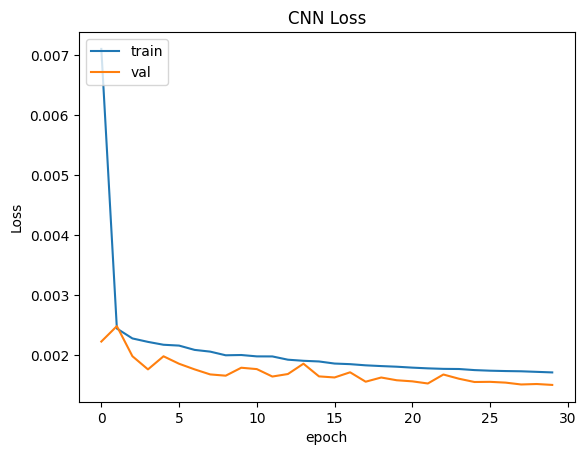

In [46]:
# check CNN performance by ploting the train and val Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
# evaluate on the validation set
validation_loss, validation_accuracy = final_model.evaluate(val_x, val_y, verbose=verbose)
print("Validation Loss:", validation_loss)

1081/1081 [==============================] - 4s 3ms/step - loss: 0.0015 - mae: 0.0187
Validation Loss: 0.0014991224743425846


In [48]:
# some metrics
val_predictions = final_model.predict(val_x)
# Calculating regression metrics
mse = mean_squared_error(val_y, val_predictions)
mae = mean_absolute_error(val_y, val_predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

1081/1081 [==============================] - 4s 3ms/step
Mean Squared Error: 0.0014991055
Mean Absolute Error: 0.018717503
Root Mean Squared Error: 0.038718283


Test the model prediction

In [49]:
# convert test data into inputs and outputs   x/y
n_input1=12
test_xt, test_yt = to_supervised(test, n_input1)

In [50]:
# test input content
test_xt

array([[[0.01828716, 0.        , 0.81292427, ..., 0.        ,
         0.03225806, 0.04741944],
        [0.02426218, 0.07194245, 0.82455593, ..., 0.        ,
         0.03225806, 0.05606497],
        [0.02335687, 0.07194245, 0.8313408 , ..., 0.0125    ,
         0.        , 0.05475504],
        ...,
        [0.0287887 , 0.11366907, 0.747981  , ..., 0.0125    ,
         0.        , 0.06261462],
        [0.02987507, 0.14532375, 0.75347364, ..., 0.025     ,
         0.03225806, 0.04846738],
        [0.03041825, 0.1438849 , 0.7269791 , ..., 0.0125    ,
         0.03225806, 0.05711292]],

       [[0.03059931, 0.14532375, 0.74442685, ..., 0.0125    ,
         0.        , 0.06523447],
        [0.03041825, 0.1438849 , 0.7315025 , ..., 0.025     ,
         0.03225806, 0.04925334],
        [0.03059931, 0.14532375, 0.7550893 , ..., 0.0125    ,
         0.03225806, 0.0573749 ],
        ...,
        [0.03186674, 0.14964029, 0.8151857 , ..., 0.025     ,
         0.03225806, 0.05134923],
        [0.0

In [51]:
# prediction
yhatt = final_model.predict(test_xt, verbose=0)

In [52]:
# evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate Mean Squared Error (MSE)   if near to o a good pred
mse = mean_squared_error(test_yt, yhatt)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (coefficient of determination)   if near to one a good prediction
r2 = r2_score(test_yt, yhatt)
print(f"R-squared (R2): {r2}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_yt, yhatt)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 0.0012245078105479479
R-squared (R2): 0.8075840774241078
Mean Absolute Error: 0.017345628


Unit test

In [53]:
# test using new data
x_test4=dataset[208990:209002]
y_test4=dataset[209002:209009]

In [54]:
# conversion for CNN model
x_test4 = x_test4.astype('float32')
data4 = array(x_test4)
data4 = data4.reshape((1, data4.shape[0], data4.shape[1]))

In [55]:
# prediction
yhat4 = final_model.predict(data4, verbose=0)

In [56]:
# convert y_test data to match with x_test data (for evaluation)
y_test4 = y_test4.astype('float32')
y_test4 = array(y_test4)
ytest4_array=y_test4[:,0]
ytest4_array = ytest4_array.reshape(1, 7)

In [57]:
# evaluation
from sklearn.metrics import r2_score
# Calculate Mean Squared Error (MSE)   if near to o a good pred
mse = mean_squared_error(ytest4_array, yhat4)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (coefficient of determination)   if near to one a good prediction
r2 = r2_score(ytest4_array, yhat4)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.006660641636699438
R-squared (R2): nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [58]:
# test output real content
ytest4_array

array([[0.33297122, 0.33188486, 0.3307985 , 0.3307985 , 0.32971212,
        0.33043638, 0.33061743]], dtype=float32)

In [59]:
# predicted output content
yhat4

array([[0.2565313 , 0.25338554, 0.23983058, 0.24498236, 0.24522284,
        0.25378218, 0.25338137]], dtype=float32)